# Machine Learning

After choosing the variables that we want to use for fitting models, we then fit them into three models which are
> 1. **Logistic Regression** <br>
> 2. **Random Forest** <br>
> 3. **Gradient Boosting**

In [17]:
#import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
sb.set()

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
pd.set_option('display.max_columns', None)  # Unlimited columns.
pd.options.mode.use_inf_as_na = True        # Any inf or -inf is 
                                            # treated as NA.

In [18]:
#read the file with organized data
diabetes_use = pd.read_csv('dataset/diabetes_EDA.csv')

In [19]:
diabetes_condition = pd.DataFrame(diabetes_use['Diabetes_binary'])
diabetes_variables = pd.DataFrame(diabetes_use[["HighBP", "HighChol","DiffWalk", "BMI", "GenHlth", "PhysHlth", "Age", "Income","HeartDiseaseorAttack","Smoker"]]) 
x_train, x_test, y_train, y_test = train_test_split(diabetes_variables, diabetes_condition, test_size = 0.25)

### Defining Functions
For further convenience, we decide to define a function `print_confusion` to print confusion matrix for **train** and **test** datasets together with:
- Classification accuracy
- True Positive Rate
- False Negative Rate
- True Negative Rate
- False Positive Rate

In [20]:
def print_confusion(model, x_train, x_test, y_train, y_test):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #Print the classification accuracy
    print("The classification accuracy of Train Set \t:", round(model.score(x_train, y_train)*100, 2), "%")
    print("The classification accuracy of Test Set \t:", round(model.score(x_test, y_test)*100, 2), "%")

    print()

    #Print the TPR and FPR for train set
    lr_tr = confusion_matrix(y_train, y_train_pred)
    FP_tr_3 = lr_tr[0][1]
    FN_tr_3 = lr_tr[1][0]
    TP_tr_3 = lr_tr[1][1]
    TN_tr_3 = lr_tr[0][0]
    print("For train set")
    print("The True Positive Rate of trian set for this model \t:", round(TP_tr_3/(FN_tr_3 + TP_tr_3)*100, 2), "%")
    print("The False Negative Rate of train set of this model \t:", round(FN_tr_3/(TP_tr_3 + FN_tr_3)*100, 2), "%")
    print("The True Negative Rate of train set of this model \t:", round(TN_tr_3/(TN_tr_3 + FP_tr_3)*100, 2), "%")
    print("The False Positive Rate of train set for this model \t:", round(FP_tr_3/(FP_tr_3 + TN_tr_3)*100, 2), "%")


    print()

    #Print the TPR and FPR for test set
    lr_tt = confusion_matrix(y_test, y_test_pred)
    FP_tt_3 = lr_tt[0][1]
    FN_tt_3 = lr_tt[1][0]
    TP_tt_3 = lr_tt[1][1]
    TN_tt_3 = lr_tt[0][0]
    print("For test set")
    print("The True Positive Rate of test set for this model \t:", round(TP_tt_3/(FN_tt_3 + TP_tt_3)*100, 2), "%")
    print("The False Negative Rate of test set of this model \t:", round(FN_tt_3/(TP_tt_3 + FN_tt_3)*100, 2), "%")
    print("The True Negative Rate of test set of this model \t:", round(TN_tt_3/(TN_tt_3 + FP_tt_3)*100, 2), "%")
    print("The False Positive Rate of test set for this model \t:", round(FP_tt_3/(FP_tt_3 + TN_tt_3)*100, 2), "%")

    #Print the two-way confusion map for train(left) and test(right)
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    axes[0].set_title("Train set")
    axes[1].set_title("Test set")

## Model fitting

We start fitting all the data into three models and figure out the information provided by them respectively.

### Model 1: Logistic Regression

In [21]:
#import the essential file for the model
from sklearn.linear_model import LogisticRegression
l_regression = LogisticRegression()
l_regression.fit(x_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The classification accuracy of Train Set 	: 73.99 %
The classification accuracy of Test Set 	: 74.09 %

For train set
The True Positive Rate of trian set for this model 	: 74.88 %
The False Negative Rate of train set of this model 	: 25.12 %
The True Negative Rate of train set of this model 	: 73.14 %
The False Positive Rate of train set for this model 	: 26.86 %

For test set
The True Positive Rate of test set for this model 	: 75.07 %
The False Negative Rate of test set of this model 	: 24.93 %
The True Negative Rate of test set of this model 	: 73.14 %
The False Positive Rate of test set for this model 	: 26.86 %


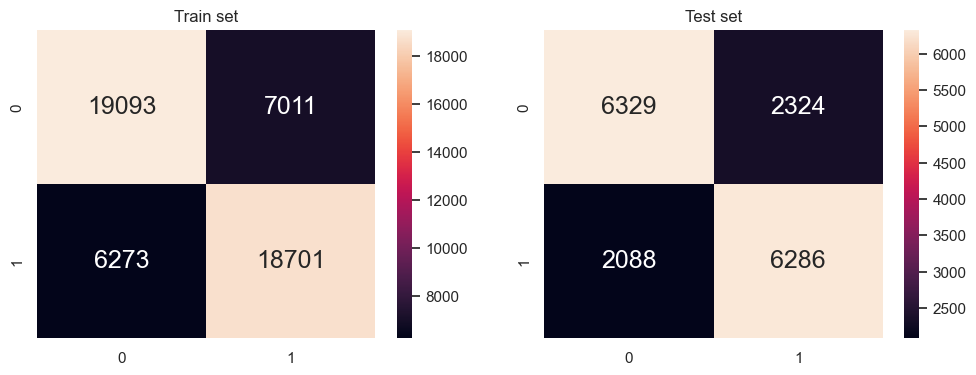

In [22]:
#print the information of the model
print_confusion(l_regression, x_train, x_test, y_train, y_test)

### Model 2: Random Forest 

In [23]:
#import the essential file for the model
from sklearn.ensemble import RandomForestClassifier
r_forest = RandomForestClassifier()
r_forest.fit(x_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

The classification accuracy of Train Set 	: 94.35 %
The classification accuracy of Test Set 	: 70.72 %

For train set
The True Positive Rate of trian set for this model 	: 93.55 %
The False Negative Rate of train set of this model 	: 6.45 %
The True Negative Rate of train set of this model 	: 95.12 %
The False Positive Rate of train set for this model 	: 4.88 %

For test set
The True Positive Rate of test set for this model 	: 72.71 %
The False Negative Rate of test set of this model 	: 27.29 %
The True Negative Rate of test set of this model 	: 68.8 %
The False Positive Rate of test set for this model 	: 31.2 %


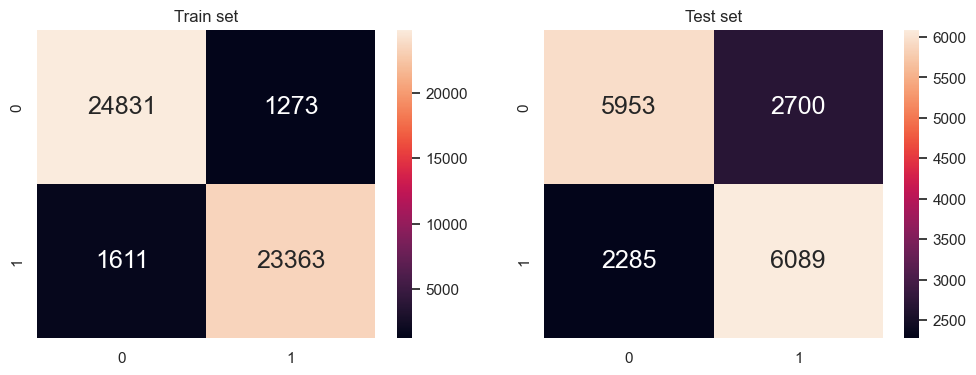

In [24]:
#print the information of the model
print_confusion(r_forest, x_train, x_test, y_train, y_test)

### Model 3: Gradient Boosting

In [46]:
#import the essential file for the model
from sklearn.ensemble import GradientBoostingClassifier
g_boosting = GradientBoostingClassifier()
g_boosting.fit(x_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

The classification accuracy of Train Set 	: 74.71 %
The classification accuracy of Test Set 	: 74.24 %

For train set
The True Positive Rate of trian set for this model 	: 78.27 %
The False Negative Rate of train set of this model 	: 21.73 %
The True Negative Rate of train set of this model 	: 71.31 %
The False Positive Rate of train set for this model 	: 28.69 %

For test set
The True Positive Rate of test set for this model 	: 77.73 %
The False Negative Rate of test set of this model 	: 22.27 %
The True Negative Rate of test set of this model 	: 70.85 %
The False Positive Rate of test set for this model 	: 29.15 %


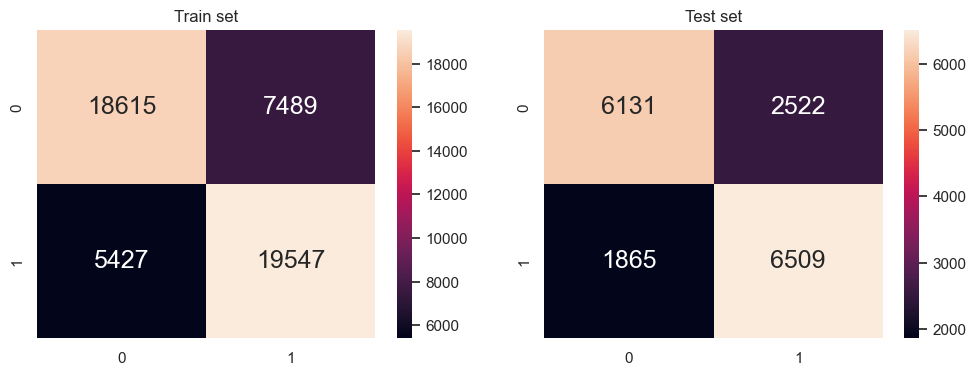

In [47]:
#print the information of the model
print_confusion(g_boosting, x_train, x_test, y_train, y_test)

# Feature Importance

In this area, we are going to figure out the **importance** of each variable in three models respectively. We will be using the concept of ***Feature Importance*** that provides the numerical importance of each variable. 

### Logistic Regression

<Axes: ylabel='Feature'>

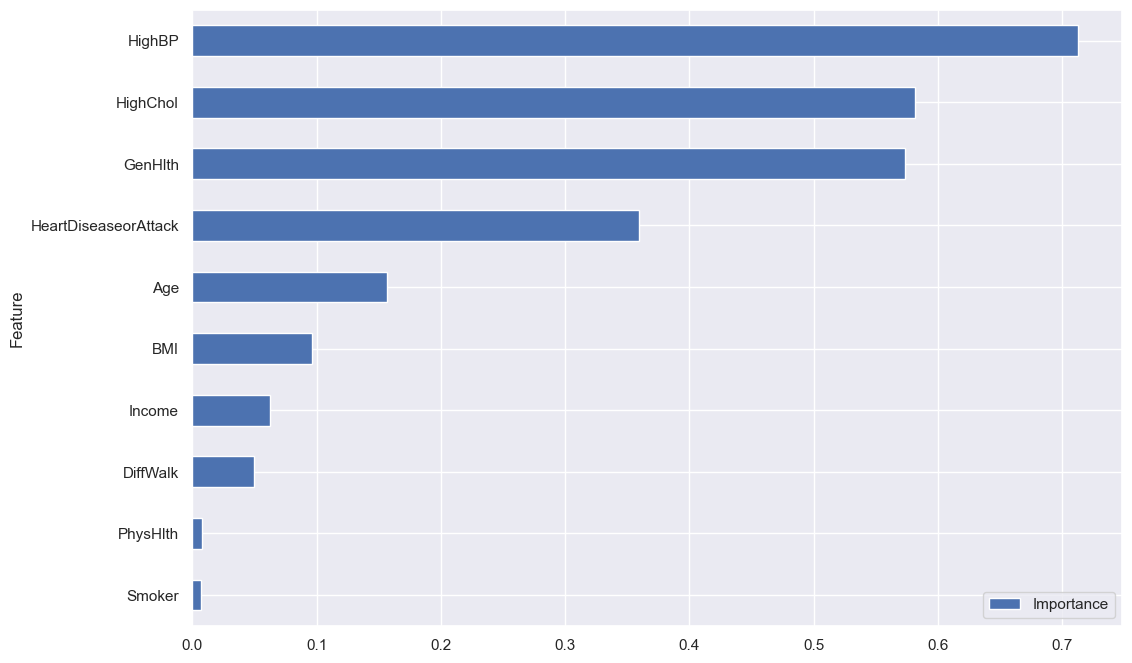

In [44]:
#visualising the importance of each variables
coefficients = l_regression.coef_[0]

feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(12,8))

### Random Forest

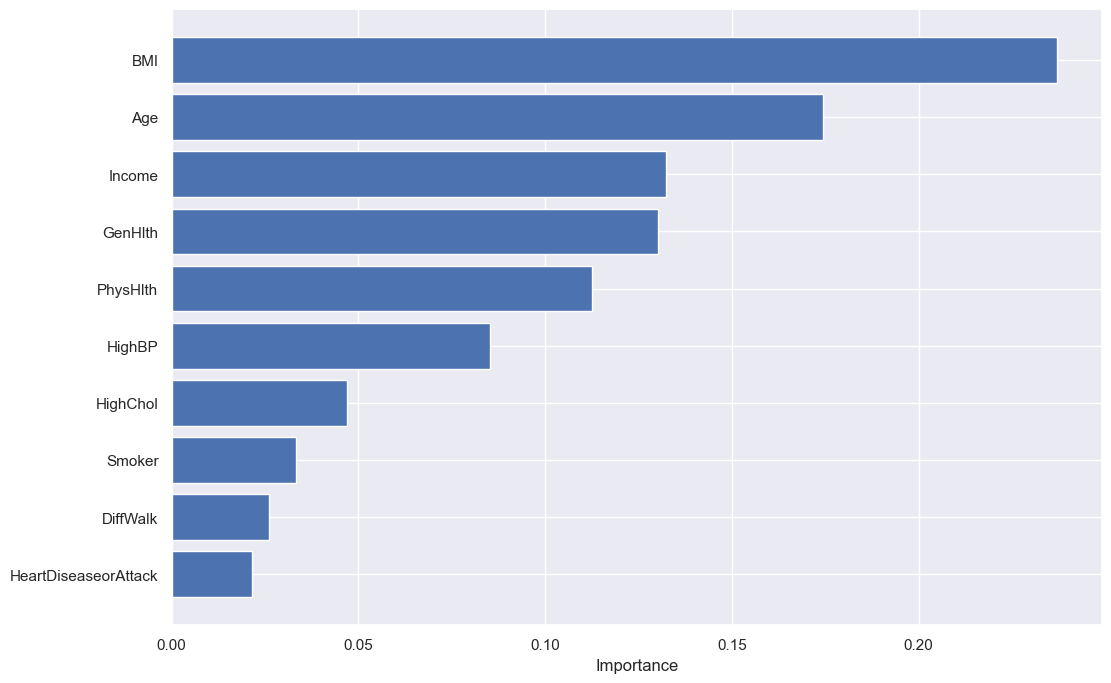

In [43]:
#visualising the importance of each variables
r_forest_impt = r_forest.feature_importances_
sort_index = r_forest_impt.argsort()
fig, ax = plt.subplots(figsize=(12,8))
plt.barh(x_train.columns[sort_index], r_forest_impt[sort_index]) 
plt.xlabel("Importance")
plt.show()

### Gradient Boosting

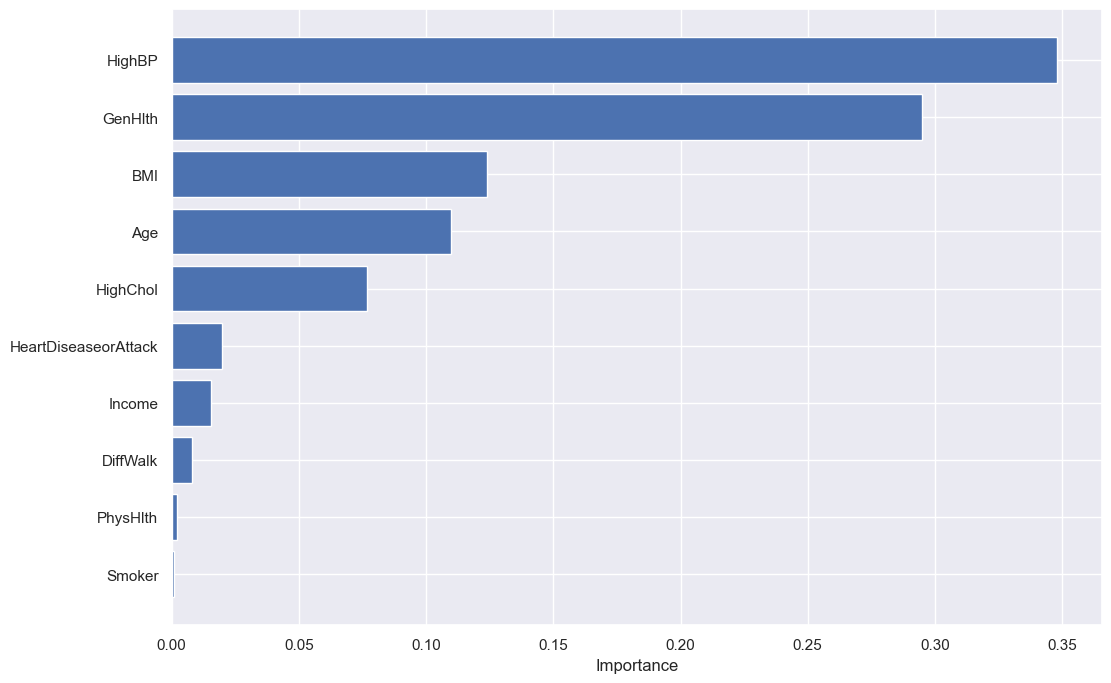

In [48]:
#visualising the importance of each variables
g_boosting_impt = g_boosting.feature_importances_
sort_index = g_boosting_impt.argsort()
fig, ax = plt.subplots(figsize=(12,8))
plt.barh(x_train.columns[sort_index], g_boosting_impt[sort_index]) 
plt.xlabel("Importance")
plt.show()

# Visualising Accuracy of Model

As we need to compare the **accuracy** of each model, we visualize it into two barchart.
> **1st** bar chart is the comparison of train and test accuracy <br>
> **2nd** bar chart is the comparison of average accuracy <br>

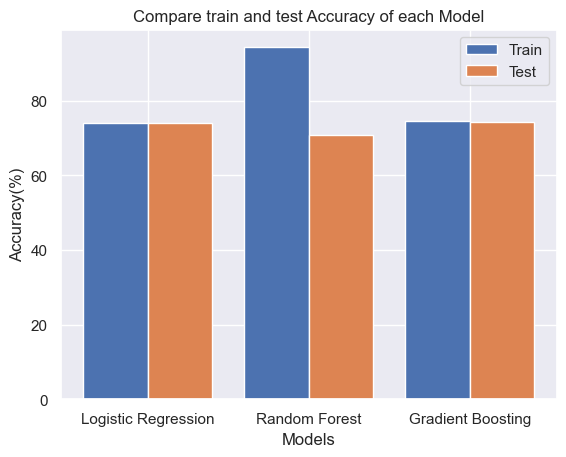

In [58]:
#putting the model and its accuracy into three list
Model = ['Logistic Regression','Random Forest','Gradient Boosting'] 
Train_Accuracy = [round(l_regression.score(x_train, y_train)*100, 2),round(r_forest.score(x_train, y_train)*100, 2),round(g_boosting.score(x_train, y_train)*100, 2)] 
Test_Accuracy = [round(l_regression.score(x_test, y_test)*100, 2),round(r_forest.score(x_test, y_test)*100, 2),round(g_boosting.score(x_test, y_test)*100, 2)] 
  
#initialise and plot the graph
X_axis = np.arange(len(Model)) 

  
plt.bar(X_axis - 0.2, Train_Accuracy, 0.4, label = 'Train') 
plt.bar(X_axis + 0.2, Test_Accuracy, 0.4, label = 'Test') 
  
plt.xticks(X_axis, Model) 
plt.xlabel("Models") 
plt.ylabel("Accuracy(%)") 
plt.title("Compare train and test Accuracy of each Model") 
plt.legend() 
plt.show() 

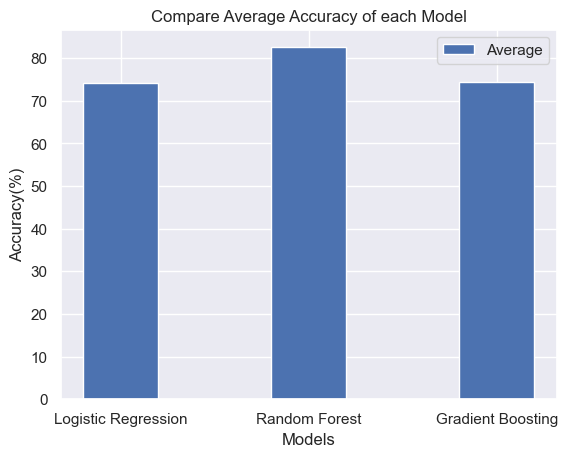

In [57]:
#putting the model and calculating the average accuracy
Model = ['Logistic Regression','Random Forest','Gradient Boosting'] 
Average = [(Train_Accuracy[0]+Test_Accuracy[0])/2, (Train_Accuracy[1]+Test_Accuracy[1])/2,(Train_Accuracy[2]+Test_Accuracy[2])/2]
  
#initialize the graph and plot it
X_axis = np.arange(len(Model)) 

plt.bar(X_axis, Average, 0.4, label = 'Average') 
  
plt.xticks(X_axis, Model) 
plt.xlabel("Models") 
plt.ylabel("Accuracy(%)") 
plt.title("Compare Average Accuracy of each Model") 
plt.legend() 
plt.show() 

# Analysis and Conclusion
### Model
After comparing the three models we used, we found that the accuracy of the three models are **almost the same**. However, as shown in the graph, the train accuracy of random forest model is significantly the highest. From our discussion, this might be due to **overfitting** of the train dataset. <br>
### Data Analysis
Learning from the feature importance graph, we get the following order of importance for each model:<br>
||Log	|  Random |	Gradient  |
| ---    | ---   | ---     |---  |
|Top 1 | HighBP 	| BMI	   |	HighBP |
|Top 2 | HighChol 	| Age  	   |	GenHlth |
|Top 3 | GenHlth | Income   |	BMI |
|Top 4 | HeartDiseaseorAttack 	| GenHlth  |	Age |
|Top 5 | Age 	| PhysHlth |	HighChol |

Thus, we conclude that the **top 8 important factors** to predict diabetes are: 
- HighBP
- BMI
- HighChol
- Age
- GenHlth
- Income
- HeartDiseaseorAttack
- PhysHlth

All in all, nowadays, as the number of diabetes are increasing tremendously, we should aware of the factors that can cause diabetes. We should start from our daily life as most of the relevant are connected to it. Preventing a chronic disease should always 